In [1]:
import numpy as np
from scipy.ndimage import imread
from scipy.misc import imsave
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# set the path to the images here
fmt_string = 'drawings_x4/gra_i%d_j%d.png'

# set the path to save the combined image to here
outfile = "combined.png"

# set the range to plot here
xs = range(-6,7)
ys = range(-6,7)

(300, 300, 3)
uint8


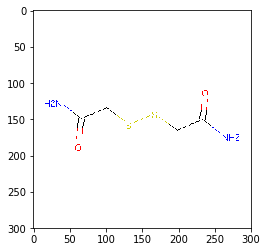

In [3]:
im = imread(fmt_string % (0,0))
print im.shape
print im.dtype
plt.imshow(im, interpolation="None");

In [4]:
canvas = np.empty((len(ys)*im.shape[0], len(xs)*im.shape[1], im.shape[2]), dtype=im.dtype)
x_to_pixel = lambda ix: (ix - xs[0])*im.shape[1]
y_to_pixel = lambda ix: (ix - ys[0])*im.shape[0]


for x in xs:
    for y in ys:
        try:
            im = imread(fmt_string % (x, y))
        except:
            im = 255*np.ones_like(im)
        x_start = x_to_pixel(x)
        y_start = y_to_pixel(y)
        # print (x,y), x_start, y_start
        canvas[y_start:y_start+im.shape[0],x_start:x_start+im.shape[1],:] = im
        if x == 0 and y == 0:
            for z in (1,2):
                assert im.shape[1] == 300
                canvas[y_start:y_start+im.shape[0],x_start,z] = 0
                canvas[y_start:y_start+im.shape[0],x_start+im.shape[1]-1,z] = 0
                canvas[y_start+im.shape[0]-1,x_start:x_start+im.shape[1],z] = 0
                canvas[y_start,x_start:x_start+im.shape[1],z] = 0

# canvas = canvas[:,:,:]
imsave(outfile, canvas)

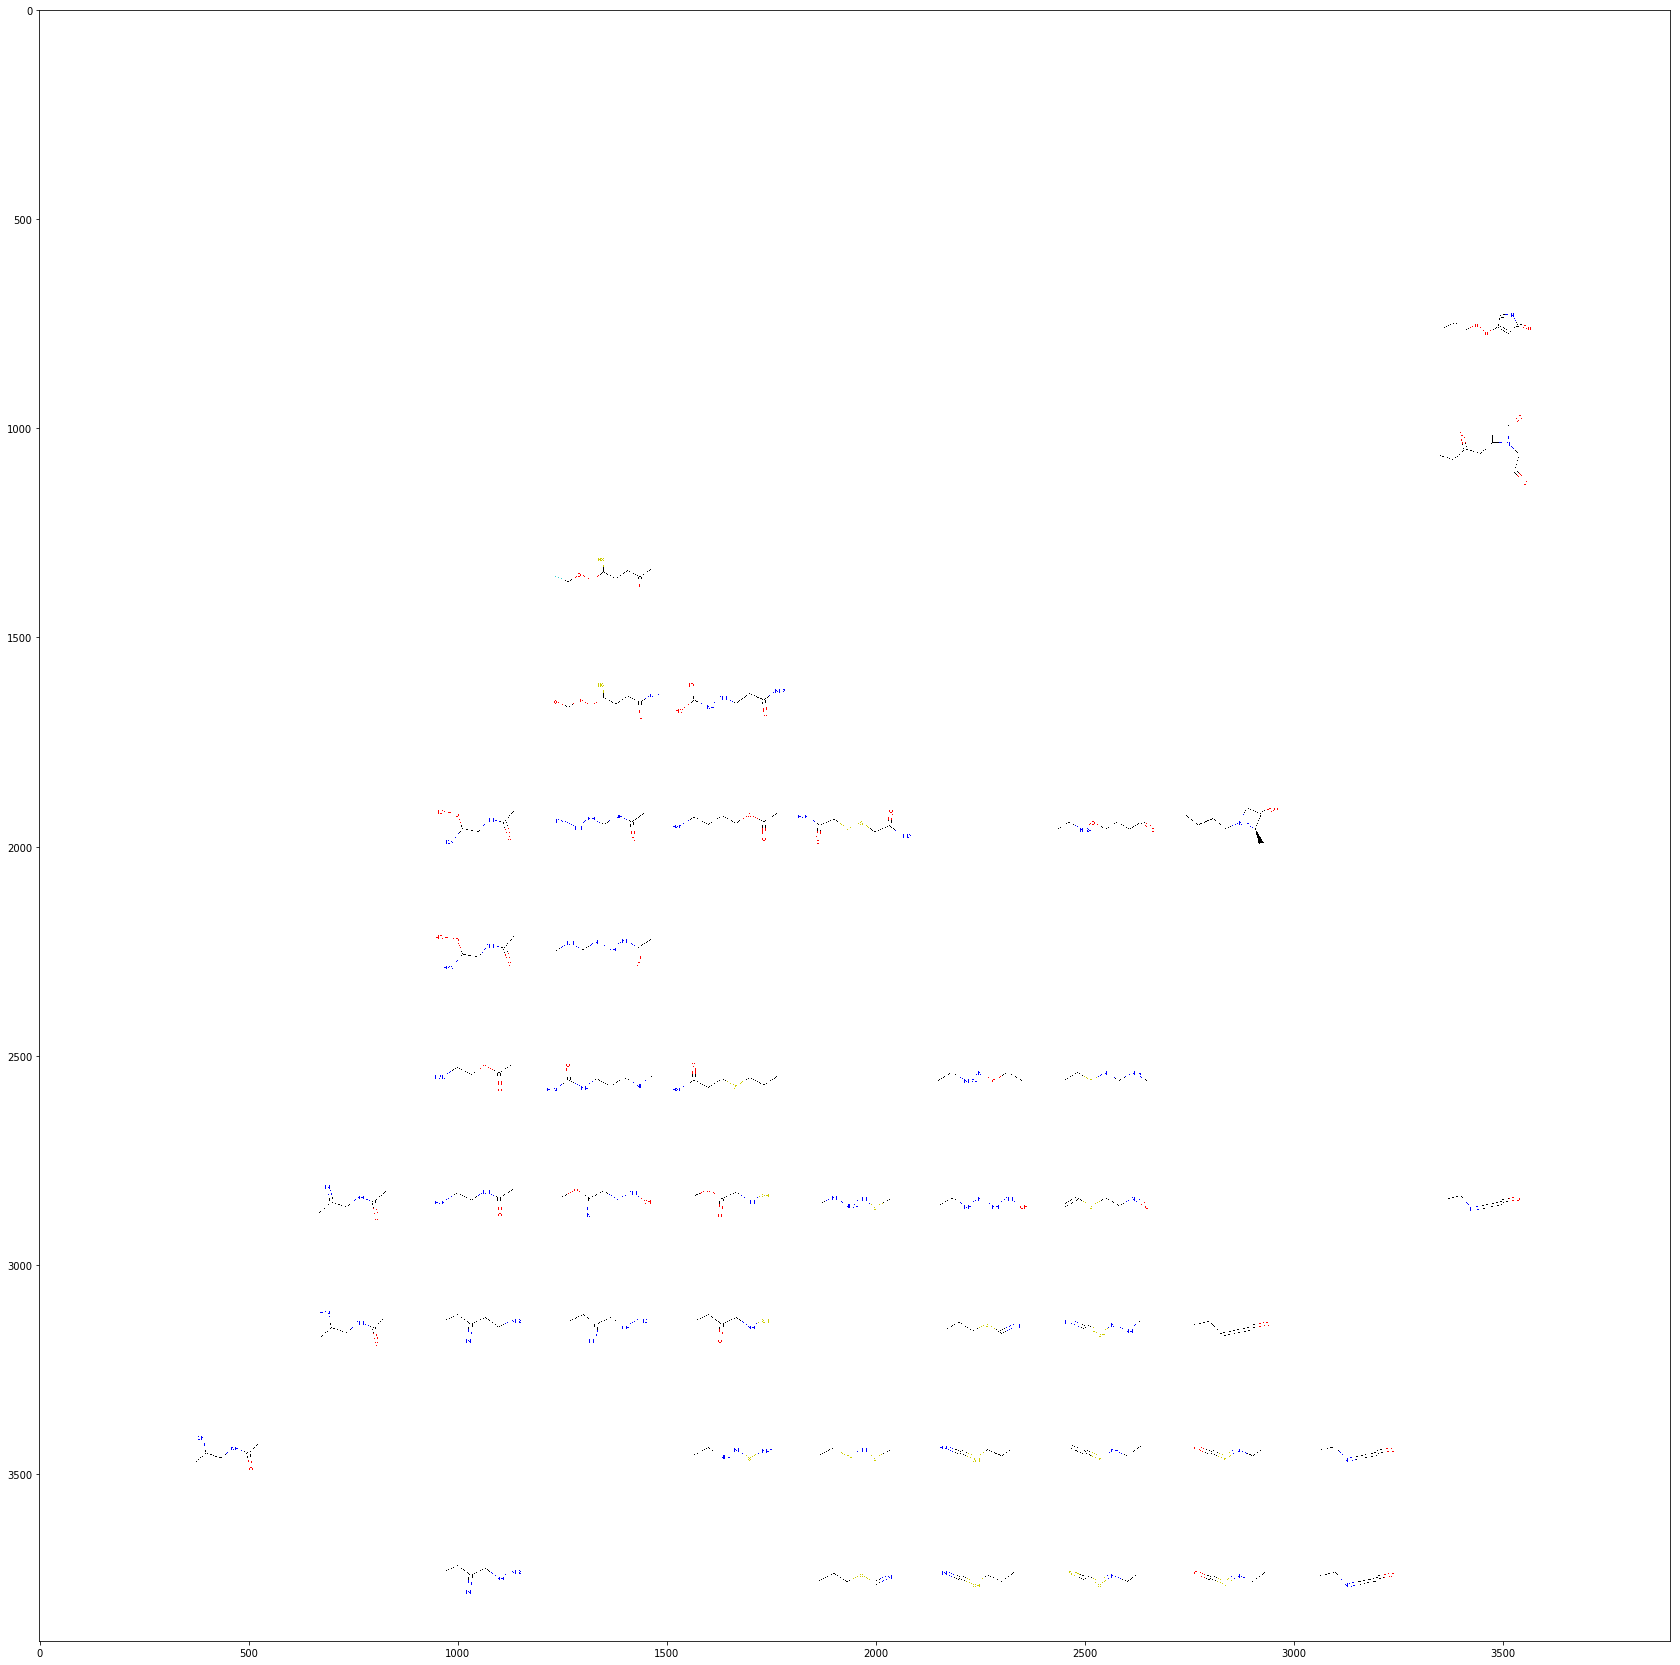

In [5]:
plt.figure(figsize=(30,30))
plt.imshow(canvas);